# Vorbereitung Dataset für die Übungsaufgabe

In [25]:
import numpy as np
np.random.seed(42)

try:
    x2=np.loadtxt('x_dataset.csv',delimiter=',')
    y2=np.loadtxt('y_dataset.csv',dtype='int64', delimiter='.')
except Exception as e:
    print(e)
    print(f"Bitte Speichern Sie die CSV Datein im gleichen Ordner, wie diese Datei")

else:
    print(f"Alles ist für die Übung vorbereitet")

from sklearn.datasets import load_breast_cancer
x, y = load_breast_cancer(return_X_y=True)

Alles ist für die Übung vorbereitet


C:\Users\Nico\AppData\Local\Temp\ipykernel_17688\3206540642.py:6: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  y2=np.loadtxt('y_dataset.csv',dtype='int64', delimiter='.')


## Aufgabe 1
Verwenden Sie Grid Search um einen Random Forest zu erstellen. Nutzen Sie dazu folgende Parameter:
- #Anzahl der Bäume= 100
- Kriterium: gini, entropy
- Maximale Tiefe: 2-8
- Mindesanzahl an Datenpunkten: 10-20
- Kreuzvalidierung: 10
- n_jobs=-1
- Aufteilung des Datasets: train:70%, test:30%

Rechenzeit: ca. 50s
  

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Decision Tree with reasonable defaults
parameters = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [2, 3, 4, 5, 6, 7, 8], 
    "min_samples_split": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
    "max_features": ["sqrt", "log2"],
    "n_estimators": [100],
    "max_features": ['sqrt', 'log2']
}
clf_tree = RandomForestClassifier()
grid_cv = GridSearchCV(clf_tree, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)
clf_tree.fit(x_test, y_test)
scores = clf_tree.score(x_test, y_test)
scores = cross_val_score(clf_tree, x_train, y_train, cv=10)
print("Tree Accuarcy:", scores)
print("Tree cross scores",scores)
print("Best Tree Params", grid_cv.best_params_)



Best Tree Params {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
print("Best Tree Score", grid_cv.best_score_ * 100.0, "%")

Best Tree Score 95.96794871794872 %


## Aufgabe 2
Trainieren Sie mit den erlernten Parametern nochmals einen Random Forest. Sie können die besten Parameter direkt beim Aufruf des Objektes mit **grid_cv.best_params übergeben. Bewerten Sie die Genauigkeit des Algorithmus.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf_tree = RandomForestClassifier(**grid_cv.best_params_)
grid_cv = GridSearchCV(clf_tree, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)
clf_tree.fit(x_test, y_test)
scores = clf_tree.score(x_test, y_test)
scores = cross_val_score(clf_tree, x_train, y_train, cv=10)
print("Tree Accuarcy:", scores)
print("Tree cross scores",scores)
print("Best Tree Params", grid_cv.best_params_)


Tree Accuarcy: [0.925      0.95       0.95       1.         0.975      0.95
 0.95       0.925      0.94871795 1.        ]
Tree cross scores [0.925      0.95       0.95       1.         0.975      0.95
 0.95       0.925      0.94871795 1.        ]
Best Tree Params {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}


## Aufgabe 3
Bestimmen Sie die Confusion Matrix für den Random Forest. Interpretieren Sie das Ergebnis der Confussion Matrix

[[ 62   1]
 [  0 108]]


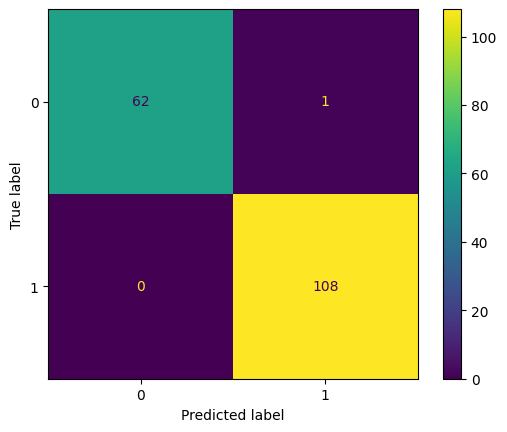

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, clf_tree.predict(x_test))
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot()

## Aufgabe 4
Wiederholen Sie die Aufgabe erneut mit dem zweiten Dataset <b>x2 und y2.</b>

- #Anzahl der Bäume= 120
- Kriterium: gini, entropy
- Maximale Tiefe: 5
- Mindesanzahl an Datenpunkten: 10
- Kreuzvalidierung: 10
- n_jobs=-1
- Aufteilung des Datasets: train:70%, test:30%

Rechenzeit: ca. 2min

In [16]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3)
parameters = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [2, 3, 4, 5, 6, 7, 8], 
    "min_samples_split": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
    "max_features": ["sqrt", "log2"],
    "n_estimators": [100],
    "max_features": ['sqrt', 'log2']
}
clf_tree = RandomForestClassifier()
grid_cv = GridSearchCV(clf_tree, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x2_train, y2_train)
clf_tree.fit(x2_test, y2_test)
scores = clf_tree.score(x2_test, y2_test)
scores = cross_val_score(clf_tree, x2_train, y2_train, cv=10, n_jobs=-1)
print("Tree Accuarcy:", scores)
print("Tree cross scores",scores)
print("Best Tree Params", grid_cv.best_params_)

clf_tree = RandomForestClassifier(**grid_cv.best_params_)
grid_cv = GridSearchCV(clf_tree, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x2_train, y2_train)
clf_tree.fit(x2_test, y2_test)
scores = clf_tree.score(x2_test, y2_test)
scores = cross_val_score(clf_tree, x2_train, y2_train, cv=10)
print("Tree Accuarcy:", scores)
print("Tree cross scores",scores)
print("Best Tree Params", grid_cv.best_params_)

KeyboardInterrupt: 

In [ ]:
confusion_matrix = confusion_matrix(y2_test, clf_tree.predict(x2_test))
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot()

[[2020  102   54  171  104   55]
 [  50 1925  175   54  202  121]
 [ 121  177 1900  150  141   68]
 [  81   36  104 1862  136  233]
 [ 155  121   95   80 1944   97]
 [ 133   55  133  165   91 1889]]
